In [4]:
import re
import unicodedata
import pandas as pd
import nltk

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

# Spam Data

In [5]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
df = pd.read_csv('./spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
ham_frequency = pd.Series(ham_words).value_counts()

In [20]:
spam_words = clean(' '.join(df[df.label == 'spam'].text))
spam_frequency = pd.Series(ham_words).value_counts()

In [27]:
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                   .value_counts()
                   .head(20))

In [93]:
ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

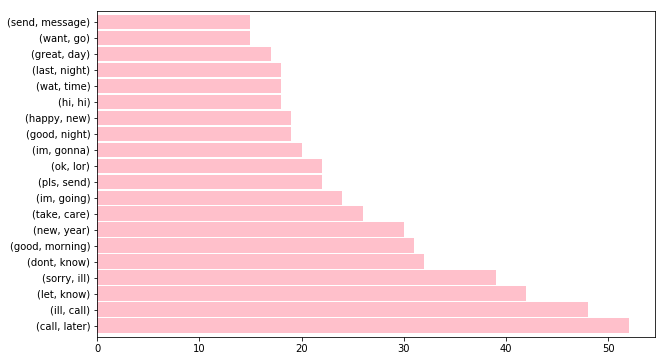

In [96]:
ham_bigrams.plot.barh(width=.9, figsize=(10,6), color='pink')

In [29]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                    .value_counts()
                    .head(20))

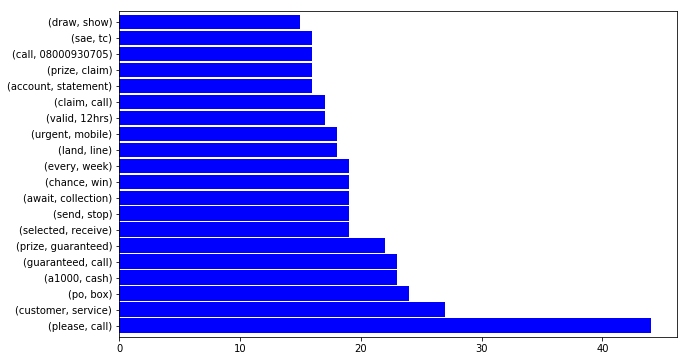

In [99]:
spam_bigrams.plot.barh(width=.9, figsize=(10,6), color='blue')

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(-0.5, 799.5, 399.5, -0.5)

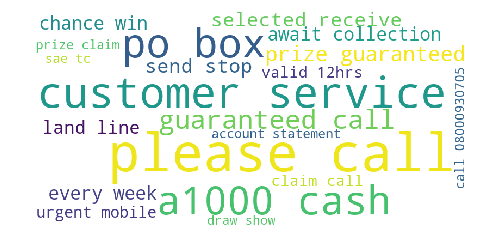

In [35]:
from wordcloud import WordCloud

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

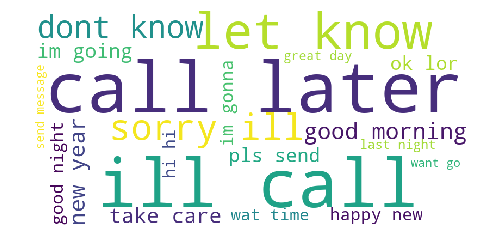

In [36]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

In [54]:
bigram_counts = pd.concat([spam_bigrams, ham_bigrams], sort=True, axis=1)
bigram_counts.columns = ['spam_bigram', 'ham_bigram']
bigram_counts.fillna(0)

spam_bigram  ham_bigram
a1000      cash                23.0         0.0
account    statement           16.0         0.0
await      collection          19.0         0.0
call       08000930705         16.0         0.0
           later                0.0        52.0
chance     win                 19.0         0.0
claim      call                17.0         0.0
customer   service             27.0         0.0
dont       know                 0.0        32.0
draw       show                15.0         0.0
every      week                19.0         0.0
good       morning              0.0        31.0
           night                0.0        19.0
great      day                  0.0        17.0
guaranteed call                23.0         0.0
happy      new                  0.0        19.0
hi         hi                   0.0        18.0
ill        call                 0.0        48.0
im         going                0.0        24.0
           gonna                0.0        20.0
land       line                18.0         0.0
last       night                0.0        18.0
let        know                 0.0        42.0
new        year                 0.0        30.0
ok         lor                  0.0        22.0
please     call                44.0         0.0
pls        send                 0.0        22.0
po         box                 24.0         0.0
prize      claim               16.0         0.0
           guaranteed          22.0         0.0
sae        tc                  16.0         0.0
selected   receive             19.0         0.0
send       message              0.0        15.0
           stop                19.0         0.0
sorry      ill                  0.0        39.0
take       care                 0.0        26.0
urgent     mobile              18.0         0.0
valid      12hrs               17.0         0.0
want       go                   0.0        15.0
wat        time                 0.0        18.0

In [85]:
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                    .value_counts()
                    .head(30))

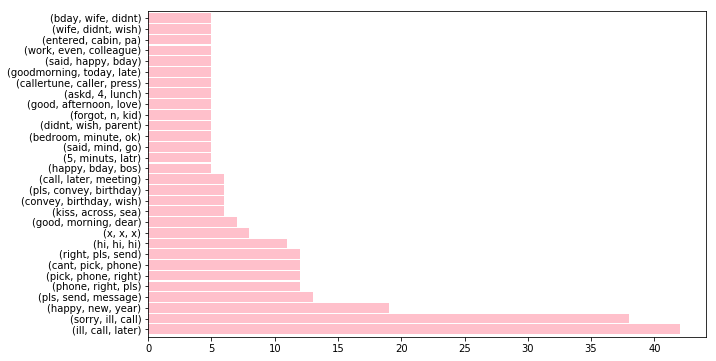

In [97]:
ham_trigrams.plot.barh(color='pink', width=.9, figsize=(10, 6))

In [87]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                    .value_counts()
                    .head(30))

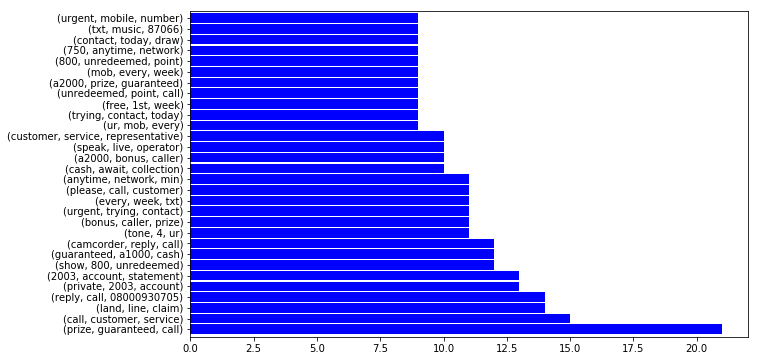

In [98]:
spam_trigrams.plot.barh(color='blue', width=.9, figsize=(10,6))

(-0.5, 799.5, 399.5, -0.5)

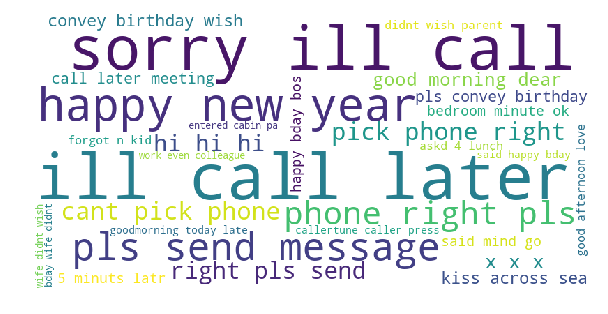

In [89]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

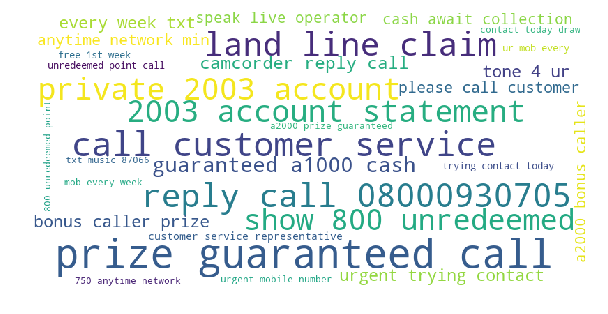

In [90]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')

# Blog Articles Data

In [91]:
from acquire import get_blog_articles
from acquire import get_news_articles
from prepare import prepare_article_data

In [92]:
prepare_article_data(get_blog_articles())

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.